
## **Variables y tipos de datos**

### **Noci√≥n de variable**

Representa una caracter√≠stica medible de la unidad de observaci√≥n.
Ejemplo: ‚Äúedad‚Äù, ‚Äúg√©nero‚Äù, ‚Äúnivel de ingresos‚Äù.

---

### **Tipos de variables**

| Tipo                              | Subtipo    | Ejemplo           | Observaciones                               |
| --------------------------------- | ---------- | ----------------- | ------------------------------------------- |
| **Cuantitativa**                  | *Discreta* | N¬∫ de hijos       | Solo enteros                                |
|                                   | *Continua* | Peso, temperatura | Puede tener decimales                       |
| **Cualitativa**                   | *Nominal*  | Color, pa√≠s       | Sin orden                                   |
|                                   | *Ordinal*  | Nivel educativo   | Con jerarqu√≠a                               |
| **L√≥gica**                        | ‚Äî          | Verdadero/Falso   | Muy usada en ML                             |
| **Metadatos / Alta cardinalidad** | ‚Äî          | ID cliente        | Identificadores, no se modelan directamente |

*En machine learning*: elegir bien el tipo de variable define el tipo de preprocesamiento (por ejemplo, normalizaci√≥n, codificaci√≥n, etc.).

---

## **4. Medidas de resumen**

### 4.1. **Cuantitativas**

| Medida                  | Qu√© mide                          | F√≥rmula o idea                          |
| ----------------------- | --------------------------------- | --------------------------------------- |
| **Media**               | Promedio                          | (Œ£x·µ¢)/n                                 |
| **Mediana**             | Valor central                     | Divide el conjunto en dos mitades       |
| **Moda**                | Valor m√°s frecuente               | Aplica tambi√©n a categor√≠as             |
| **Varianza (s¬≤)**       | Dispersi√≥n cuadr√°tica             | Promedio de las diferencias al cuadrado |
| **Desv√≠o est√°ndar (s)** | Dispersi√≥n en unidades originales | ‚àövarianza                               |

*Interpretaci√≥n*:
Si dos variables tienen igual media pero distinta desviaci√≥n est√°ndar, una es m√°s ‚Äúvariable‚Äù o dispersa que la otra.

---

### **Cualitativas**

Solo se analizan **frecuencias o proporciones**.
Medidas de tendencia central
    *Moda*: Es la categor√≠a que aparece con mayor frecuencia en el conjunto de datos. Esta es la √∫nica medida de tendencia central que se puede usar para datos cualitativos nominales. 
    *Mediana*: Solo se puede calcular para datos cualitativos de tipo ordinal (que se pueden ordenar). 
Ejemplo:

| Categor√≠a | Frecuencia | Porcentaje |
| --------- | ---------- | ---------- |
| Masculino | 60         | 60%        |
| Femenino  | 40         | 40%        |

La **moda categ√≥rica** es la categor√≠a m√°s com√∫n.

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [12]:
url = "https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/glasdoordata.csv"
df = pd.read_csv(url)
df = df.assign(
    performance=df["performance"].astype("category"),
    seniority=df["seniority"].astype("category")
)
df.head()

jobtitle  gender  age performance education      department  \
0     Graphic Designer  Female   18           5   College      Operations   
1    Software Engineer    Male   21           5   College      Management   
2  Warehouse Associate  Female   19           4       PhD  Administration   
3    Software Engineer    Male   20           5   Masters           Sales   
4     Graphic Designer    Male   26           5   Masters     Engineering   

  seniority  income  bonus  
0         2   42363   9938  
1         5  108476  11128  
2         5   90208   9268  
3         4  108080  10154  
4         5   99464   9319

In [13]:

numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"\nColumnas num√©ricas: {list(numeric_columns)}")

# Calcular varianza y desviaci√≥n est√°ndar para cada columna num√©rica
print("\n VARIANZA Y DESVIACI√ìN EST√ÅNDAR")
results = {}

for col in numeric_columns:
    # Eliminar valores NaN para el c√°lculo
    data = df[col].dropna()
    
    # C√°lculos manuales
    media = np.mean(data)
    n = len(data)
    
    # Varianza poblacional (dividiendo por N)
    varianza_poblacional = np.sum((data - media)**2) / n
    
    # Varianza muestral (dividiendo por n-1)
    varianza_muestral = np.sum((data - media)**2) / (n - 1)
    
    # Desviaci√≥n est√°ndar
    desv_std_poblacional = np.sqrt(varianza_poblacional)
    desv_std_muestral = np.sqrt(varianza_muestral)
    
    # Usando funciones de numpy (para verificaci√≥n)
    var_numpy = np.var(data, ddof=1)  # ddof=1 para muestra, ddof=0 para poblaci√≥n
    std_numpy = np.std(data, ddof=1)
    
    results[col] = {
        'media': media,
        'varianza_poblacional': varianza_poblacional,
        'varianza_muestral': varianza_muestral,
        'desv_std_poblacional': desv_std_poblacional,
        'desv_std_muestral': desv_std_muestral,
        'n': n
    }
    
    print(f"\n--- {col} ---")
    print(f"Muestra (n): {n}")
    print(f"Media: {media:.2f}")
    print(f"Varianza (poblacional): {varianza_poblacional:.2f}")
    print(f"Varianza (muestral): {varianza_muestral:.2f}")
    print(f"Desviaci√≥n est√°ndar (poblacional): {desv_std_poblacional:.2f}")
    print(f"Desviaci√≥n est√°ndar (muestral): {desv_std_muestral:.2f}")
    print(f"Verificaci√≥n con numpy - Varianza: {var_numpy:.2f}")
    print(f"Verificaci√≥n con numpy - Desv. std: {std_numpy:.2f}")


Columnas num√©ricas: ['age', 'income', 'bonus']

 VARIANZA Y DESVIACI√ìN EST√ÅNDAR

--- age ---
Muestra (n): 1000
Media: 41.39
Varianza (poblacional): 204.14
Varianza (muestral): 204.34
Desviaci√≥n est√°ndar (poblacional): 14.29
Desviaci√≥n est√°ndar (muestral): 14.29
Verificaci√≥n con numpy - Varianza: 204.34
Verificaci√≥n con numpy - Desv. std: 14.29

--- income ---
Muestra (n): 1000
Media: 94472.65
Varianza (poblacional): 641346576.75
Varianza (muestral): 641988565.31
Desviaci√≥n est√°ndar (poblacional): 25324.82
Desviaci√≥n est√°ndar (muestral): 25337.49
Verificaci√≥n con numpy - Varianza: 641988565.31
Verificaci√≥n con numpy - Desv. std: 25337.49

--- bonus ---
Muestra (n): 1000
Media: 6467.16
Varianza (poblacional): 4013511.09
Varianza (muestral): 4017528.62
Desviaci√≥n est√°ndar (poblacional): 2003.37
Desviaci√≥n est√°ndar (muestral): 2004.38
Verificaci√≥n con numpy - Varianza: 4017528.62
Verificaci√≥n con numpy - Desv. std: 2004.38


In [14]:
def display_desviacion(df:pd.DataFrame, column:str):
    
    data = df[column].dropna()
    media = results[column]['media']
    desv_std = results[column]['desv_std_muestral']
    
    plt.figure(figsize=(12, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(media + desv_std, color='orange', linestyle='--', linewidth=2, label=f'¬±1œÉ')
    plt.axvline(media - desv_std, color='orange', linestyle='--', linewidth=2)
    plt.axvline(media + 2*desv_std, color='green', linestyle='--', linewidth=1, label=f'¬±2œÉ')
    plt.axvline(media - 2*desv_std, color='green', linestyle='--', linewidth=1)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribuci√≥n de {column}')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(data)
    plt.ylabel(column)
    plt.title(f'Boxplot de {column}')
    
    plt.tight_layout()
    plt.show()

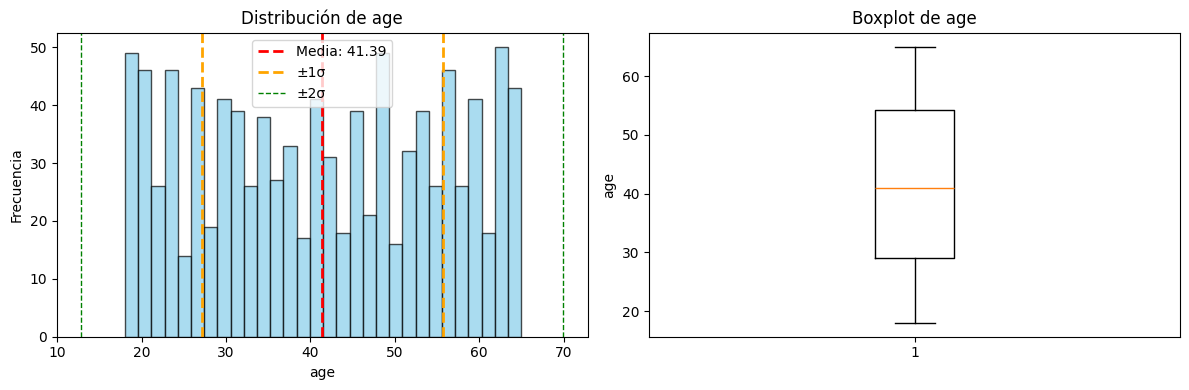

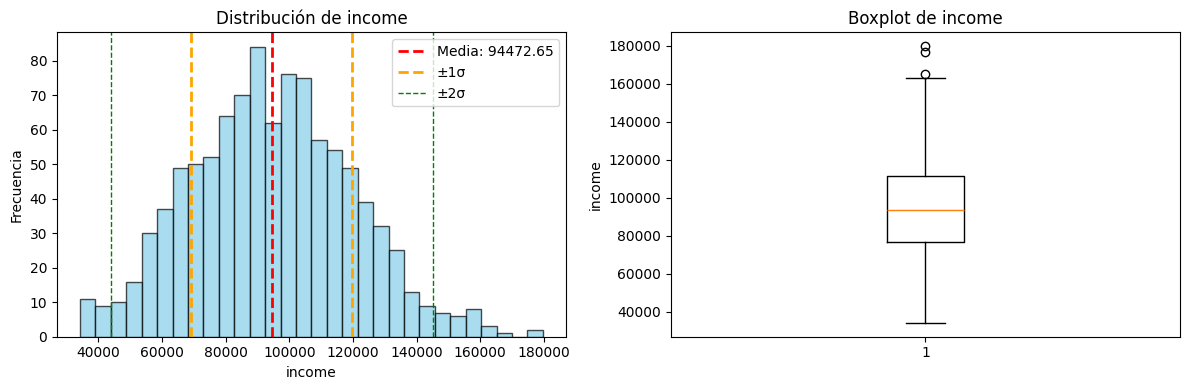

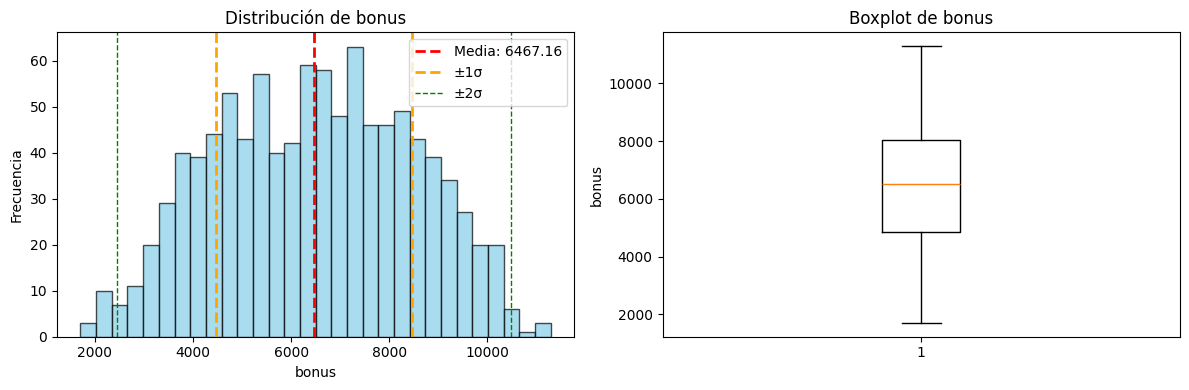

In [15]:
for column in numeric_columns:
    display_desviacion(df, column)

In [16]:
print("RESUMEN COMPARATIVO")
resumen_data = []
for col in numeric_columns:
    media = results[col]['media']
    varianza = results[col]['varianza_muestral']
    desv_std = results[col]['desv_std_muestral']
    coef_variacion = (desv_std / media) * 100 if media != 0 else float('inf')
    
    resumen_data.append({
        'Columna': col,
        'Media': media,
        'Varianza': varianza,
        'Desv_Std': desv_std,
        'Coef_Variacion_%': coef_variacion,
        'n': results[col]['n']
    })

# Crear DataFrame
resumen_df = pd.DataFrame(resumen_data)

# Mostrar el DataFrame
print(resumen_df.round(2))

RESUMEN COMPARATIVO
  Columna     Media      Varianza  Desv_Std  Coef_Variacion_%     n
0     age     41.39  2.043400e+02     14.29             34.53  1000
1  income  94472.65  6.419886e+08  25337.49             26.82  1000
2   bonus   6467.16  4.017529e+06   2004.38             30.99  1000


Mide la variabilidad relativa de los datos en comparaci√≥n con su tama√±o promedio. A diferencia de la desviaci√≥n est√°ndar (que es una medida absoluta), el CV permite comparar la variabilidad entre diferentes conjuntos de datos, incluso si tienen:

* Diferentes unidades de medida
* Diferentes escalas
* Diferentes magnitudes

```sh
CV < 15%    ‚Üí BAJA variabilidad (datos muy consistentes)
15% ‚â§ CV < 30% ‚Üí MODERADA variabilidad  
CV ‚â• 30%    ‚Üí ALTA variabilidad (datos muy dispersos)
```

In [21]:

print("\n DATAFRAME CON AN√ÅLISIS INTERPRETATIVO ")

analisis_df = pd.DataFrame({
    'Columna': numeric_columns,
    'Media': [results[col]['media'] for col in numeric_columns],
    'Varianza': [results[col]['varianza_muestral'] for col in numeric_columns],
    'Desv_Std': [results[col]['desv_std_muestral'] for col in numeric_columns],
    'CV_%': [(results[col]['desv_std_muestral'] / results[col]['media']) * 100 
             if results[col]['media'] != 0 else float('inf') 
             for col in numeric_columns],
    'Rango_68%_Inferior': [results[col]['media'] - results[col]['desv_std_muestral'] 
                          for col in numeric_columns],
    'Rango_68%_Superior': [results[col]['media'] + results[col]['desv_std_muestral'] 
                          for col in numeric_columns],
    'Interpretacion_CV': [
        "BAJA variabilidad" if ((results[col]['desv_std_muestral'] / results[col]['media']) * 100) < 15 
        else "MODERADA variabilidad" if ((results[col]['desv_std_muestral'] / results[col]['media']) * 100) < 30 
        else "ALTA variabilidad" 
        for col in numeric_columns
    ]
})

# Formatear el DataFrame
analisis_df_formateado = analisis_df.round({
    'Media': 2,
    'Varianza': 2,
    'Desv_Std': 2,
    'CV_%': 1,
    'Rango_68%_Inferior': 2,
    'Rango_68%_Superior': 2
})

print(analisis_df_formateado.to_string(index=False))


 DATAFRAME CON AN√ÅLISIS INTERPRETATIVO 
Columna    Media     Varianza  Desv_Std  CV_%  Rango_68%_Inferior  Rango_68%_Superior     Interpretacion_CV
    age    41.39       204.34     14.29  34.5               27.10               55.69     ALTA variabilidad
 income 94472.65 641988565.31  25337.49  26.8            69135.16           119810.15 MODERADA variabilidad
  bonus  6467.16   4017528.62   2004.38  31.0             4462.78             8471.54     ALTA variabilidad


In [22]:
print("RESUMEN FINAL - MEDIDAS DE VARIABILIDAD")

styled_df = (analisis_df_formateado.style
    .format({
        'Media': '{:.2f}',
        'Varianza': '{:.2f}', 
        'Desv_Std': '{:.2f}',
        'CV_%': '{:.1f}%',
        'Rango_68%_Inferior': '{:.2f}',
        'Rango_68%_Superior': '{:.2f}'
    })
    .background_gradient(subset=['Varianza'], cmap='Reds')
    .background_gradient(subset=['Desv_Std'], cmap='Blues')
    .background_gradient(subset=['CV_%'], cmap='viridis')
    )

styled_df

RESUMEN FINAL - MEDIDAS DE VARIABILIDAD


## Intervalos de confianza

Los intervalos de confianza permiten estimar un rango donde se encuentra un par√°metro poblacional con un cierto nivel de confianza.
Los IC nos permiten expresar no solo una estimaci√≥n puntual, sino tambi√©n el margen de error de esa estimaci√≥n.

In [24]:
def calcular_intervalo_confianza(data, confianza=0.95):
    n = len(data)
    media = np.mean(data)
    desv_std = np.std(data, ddof=1)  # Muestral
    
    # Valor cr√≠tico t (usamos t-student para muestras peque√±as, normal para grandes)
    if n < 30:
        valor_critico = stats.t.ppf((1 + confianza) / 2, n-1)
    else:
        valor_critico = stats.norm.ppf((1 + confianza) / 2)
    
    # Error est√°ndar
    error_estandar = desv_std / np.sqrt(n)
    
    # Margen de error
    margen_error = valor_critico * error_estandar
    
    # Intervalo de confianza
    ic_inferior = media - margen_error
    ic_superior = media + margen_error
    
    return {
        'media': media,
        'n': n,
        'desv_std': desv_std,
        'error_estandar': error_estandar,
        'margen_error': margen_error,
        'ic_inferior': ic_inferior,
        'ic_superior': ic_superior,
        'valor_critico': valor_critico,
        'confianza': confianza
    }


In [25]:
# Calcular IC para cada columna num√©rica
resultados_ic = {}
niveles_confianza = [0.90, 0.95, 0.99]

for col in numeric_columns:
    data = df[col].dropna()
    resultados_ic[col] = {}
    
    for confianza in niveles_confianza:
        resultados_ic[col][confianza] = calcular_intervalo_confianza(data, confianza)

# Mostrar resultados en tabla
print("TABLA DE INTERVALOS DE CONFIANZA")

tabla_ic = []
for col in numeric_columns:
    for confianza in niveles_confianza:
        ic = resultados_ic[col][confianza]
        tabla_ic.append({
            'Variable': col,
            'Confianza': f"{confianza*100:.0f}%",
            'Media': ic['media'],
            'IC_Inferior': ic['ic_inferior'],
            'IC_Superior': ic['ic_superior'],
            'Margen_Error': ic['margen_error'],
            'n': ic['n']
        })

df_ic = pd.DataFrame(tabla_ic)
print(df_ic.round(2).to_string(index=False))

TABLA DE INTERVALOS DE CONFIANZA
Variable Confianza    Media  IC_Inferior  IC_Superior  Margen_Error    n
     age       90%    41.39        40.65        42.14          0.74 1000
     age       95%    41.39        40.51        42.28          0.89 1000
     age       99%    41.39        40.23        42.56          1.16 1000
  income       90% 94472.65     93154.73     95790.58       1317.93 1000
  income       95% 94472.65     92902.25     96043.06       1570.41 1000
  income       99% 94472.65     92408.79     96536.52       2063.86 1000
   bonus       90%  6467.16      6362.90      6571.42        104.26 1000
   bonus       95%  6467.16      6342.93      6591.39        124.23 1000
   bonus       99%  6467.16      6303.89      6630.43        163.27 1000


In [29]:
def comparacion_niveles_confianza(df,column):

    plt.figure(figsize=(10, 6))

    confianzas = [0.90, 0.95, 0.99]
    colores = ['lightblue', 'blue', 'darkblue']
    anchos = [0.6, 0.8, 1.0]

    for i, confianza in enumerate(confianzas):
        ic = resultados_ic[column][confianza]
        
        plt.hlines(y=len(confianzas)-i, xmin=ic['ic_inferior'], xmax=ic['ic_superior'], 
                color=colores[i], linewidth=5, label=f'{confianza*100:.0f}% Confianza')
        plt.plot(ic['media'], len(confianzas)-i, 'ro', markersize=8)

    plt.axvline(x=resultados_ic[column][0.95]['media'], color='red', linestyle='--', alpha=0.7, label='Media')
    plt.xlabel('Valor')
    plt.ylabel('Nivel de Confianza')
    plt.title(f'Intervalos de Confianza para {column} - Diferentes Niveles')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yticks([1, 2, 3], ['99%', '95%', '90%'])

    # A√±adir valores
    for i, confianza in enumerate(confianzas):
        ic = resultados_ic[column][confianza]
        plt.text(ic['ic_inferior'], len(confianzas)-i + 0.1, f'{ic["ic_inferior"]:.1f}', 
                ha='center', va='bottom', fontsize=9)
        plt.text(ic['ic_superior'], len(confianzas)-i + 0.1, f'{ic["ic_superior"]:.1f}', 
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

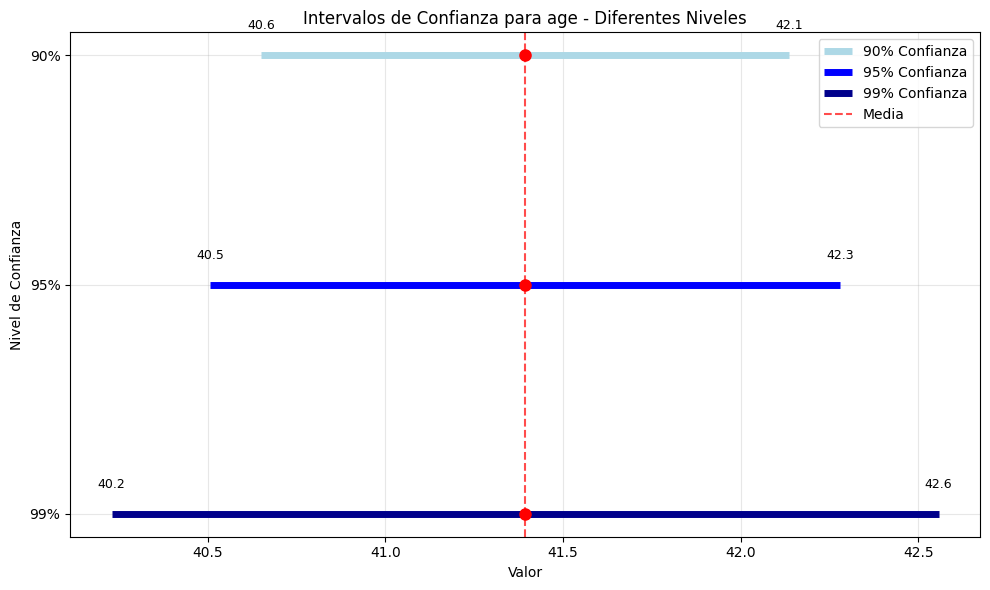

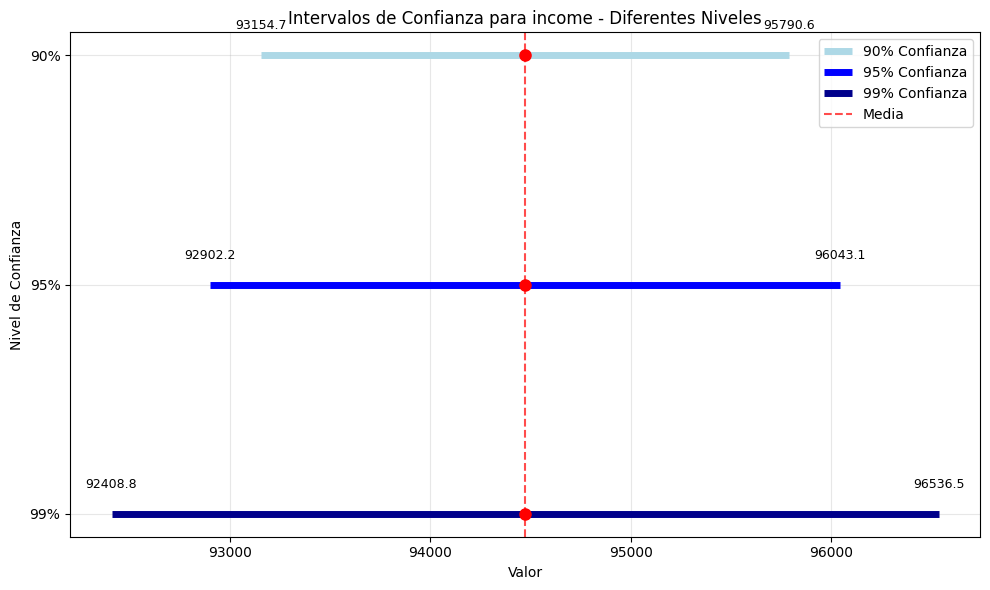

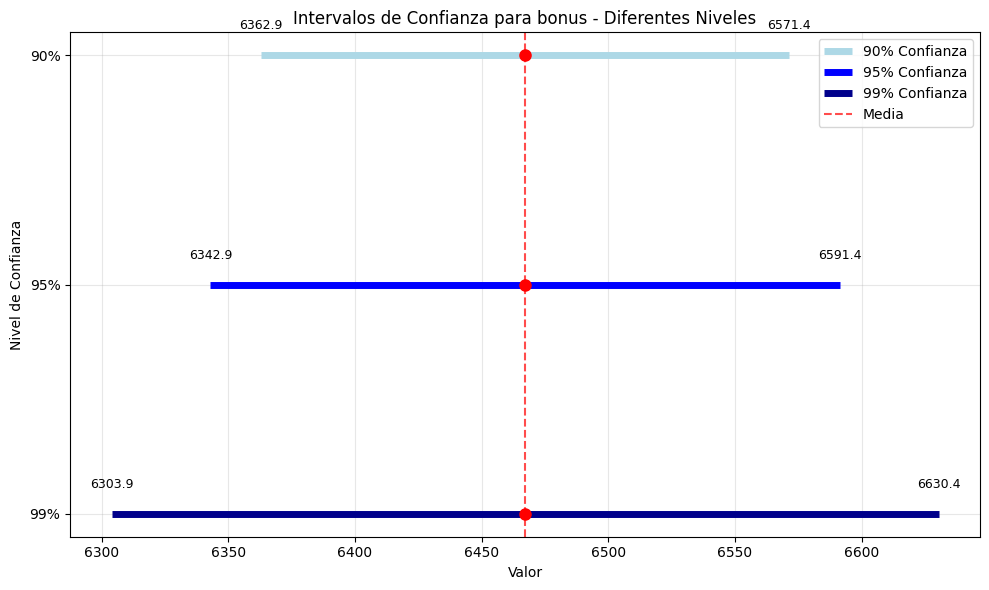

In [30]:
for column in numeric_columns:
    comparacion_niveles_confianza(df, column)

In [32]:
print("INTERPRETACI√ìN PR√ÅCTICA DE LOS INTERVALOS DE CONFIANZA")


for col in numeric_columns:
    ic_95 = resultados_ic[col][0.95]
    
    print(f"\n {col.upper()}:")
    print(f"   ‚Ä¢ Con 95% de confianza, el valor real poblacional est√° entre:")
    print(f"     {ic_95['ic_inferior']:.2f} y {ic_95['ic_superior']:.2f}")
    print(f"   ‚Ä¢ Margen de error: ¬±{ic_95['margen_error']:.2f}")
    print(f"   ‚Ä¢ Precisi√≥n: {ic_95['margen_error']/ic_95['media']*100:.1f}% de la media")
    
    # Interpretaci√≥n de precisi√≥n
    precision = (ic_95['margen_error'] / ic_95['media']) * 100
    if precision < 5:
        calidad = "EXCELENTE precisi√≥n"
    elif precision < 10:
        calidad = "BUENA precisi√≥n"
    elif precision < 20:
        calidad = "PRECISI√ìN MODERADA"
    else:
        calidad = "BAJA precisi√≥n"
    
    print(f"   ‚Ä¢ Calidad de estimaci√≥n: {calidad}")

INTERPRETACI√ìN PR√ÅCTICA DE LOS INTERVALOS DE CONFIANZA

 AGE:
   ‚Ä¢ Con 95% de confianza, el valor real poblacional est√° entre:
     40.51 y 42.28
   ‚Ä¢ Margen de error: ¬±0.89
   ‚Ä¢ Precisi√≥n: 2.1% de la media
   ‚Ä¢ Calidad de estimaci√≥n: EXCELENTE precisi√≥n

 INCOME:
   ‚Ä¢ Con 95% de confianza, el valor real poblacional est√° entre:
     92902.25 y 96043.06
   ‚Ä¢ Margen de error: ¬±1570.41
   ‚Ä¢ Precisi√≥n: 1.7% de la media
   ‚Ä¢ Calidad de estimaci√≥n: EXCELENTE precisi√≥n

 BONUS:
   ‚Ä¢ Con 95% de confianza, el valor real poblacional est√° entre:
     6342.93 y 6591.39
   ‚Ä¢ Margen de error: ¬±124.23
   ‚Ä¢ Precisi√≥n: 1.9% de la media
   ‚Ä¢ Calidad de estimaci√≥n: EXCELENTE precisi√≥n


### Deteccion de Outlier

El m√©todo del Rango Intercuart√≠lico (IQR) se usa para identificar valores at√≠picos (\(outliers\)) en un conjunto de datos, especialmente cuando no hay una distribuci√≥n normal. Sirve para encontrar valores que est√°n inusualmente altos o bajos en comparaci√≥n con el resto de los datos, y es robusto porque no se ve afectado por valores extremos. Tambi√©n se utiliza para entender la dispersi√≥n de la mitad central de los datos y como una medida de variabilidad junto con la mediana

_El m√©todo intercuartil (RIC) para la detecci√≥n de valores at√≠picos utiliza una escala de 1,5 para detectarlos , ya que se ajusta con mayor precisi√≥n a la distribuci√≥n gaussiana . Por lo tanto, el m√©todo determina que cualquier punto de datos que se encuentre 1,5 puntos por debajo del cuartil inferior o por encima del cuartil superior es un valor at√≠pico._

In [33]:
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

In [34]:
def detectar_outliers_zscore(data, columna, umbral=3):
    # principalmente para casos donde la distribucion es normal
    from scipy import stats
    z_scores = np.abs(stats.zscore(data[columna].dropna()))
    outliers_indices = np.where(z_scores > umbral)[0]
    outliers = data.iloc[outliers_indices]
    return outliers

_La distancia de Mahalanobis se usa para detectar outliers multivariados porque mide la distancia de un punto a la media de una distribuci√≥n, pero tambi√©n considera la correlaci√≥n entre las variables. Esto la hace m√°s precisa que la distancia euclidiana, ya que un punto puede estar lejos de la media en un solo eje pero no ser un outlier si sigue la tendencia de las variables correlacionadas, y viceversa. Un valor de distancia de Mahalanobis alto indica un outlier_

In [35]:
def detectar_outliers_mahalanobis(df, columnas, umbral=3):
    from scipy.spatial.distance import mahalanobis
    from scipy.linalg import inv
    
    data = df[columnas].dropna()
    cov_matrix = np.cov(data, rowvar=False)
    inv_cov_matrix = inv(cov_matrix)
    media = np.mean(data, axis=0)
    
    distancias = []
    for i in range(len(data)):
        try:
            dist = mahalanobis(data.iloc[i], media, inv_cov_matrix)
            distancias.append(dist)
        except:
            distancias.append(0)
    
    outliers = data[np.array(distancias) > umbral]
    return outliers

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analisis_completo_outliers(df, columna):
    """An√°lisis completo de outliers para una columna"""
    
    data = df[columna].dropna()
    
    # M√©todo IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lim_inf_iqr = Q1 - 1.5 * IQR
    lim_sup_iqr = Q3 + 1.5 * IQR
    
    # M√©todo Z-Score
    z_scores = np.abs(stats.zscore(data))
    lim_sup_zscore = 3
    
    # Identificar outliers
    outliers_iqr = data[(data < lim_inf_iqr) | (data > lim_sup_iqr)]
    outliers_zscore = data[z_scores > lim_sup_zscore]
    
    # Estad√≠sticas
    stats_dict = {
        'columna': columna,
        'n_total': len(data),
        'n_outliers_iqr': len(outliers_iqr),
        'n_outliers_zscore': len(outliers_zscore),
        'pct_outliers_iqr': (len(outliers_iqr) / len(data)) * 100,
        'pct_outliers_zscore': (len(outliers_zscore) / len(data)) * 100,
        'lim_inf_iqr': lim_inf_iqr,
        'lim_sup_iqr': lim_sup_iqr,
        'Q1': Q1,
        'Q3': Q3,
        'mediana': np.median(data)
    }
    
    return stats_dict, outliers_iqr, outliers_zscore

# Aplicar a todas las columnas num√©ricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

resultados_outliers = {}
print(" AN√ÅLISIS DE OUTLIERS ")

for col in numeric_columns:
    stats_dict, outliers_iqr, outliers_zscore = analisis_completo_outliers(df, col)
    resultados_outliers[col] = {
        'stats': stats_dict,
        'outliers_iqr': outliers_iqr,
        'outliers_zscore': outliers_zscore
    }
    
    print(f"\n{col}:")
    print(f"   ‚Ä¢ Outliers IQR: {stats_dict['n_outliers_iqr']} ({stats_dict['pct_outliers_iqr']:.1f}%)")
    print(f"   ‚Ä¢ Outliers Z-Score: {stats_dict['n_outliers_zscore']} ({stats_dict['pct_outliers_zscore']:.1f}%)")
    print(f"   ‚Ä¢ L√≠mites IQR: [{stats_dict['lim_inf_iqr']:.2f}, {stats_dict['lim_sup_iqr']:.2f}]")

 AN√ÅLISIS DE OUTLIERS 

age:
   ‚Ä¢ Outliers IQR: 0 (0.0%)
   ‚Ä¢ Outliers Z-Score: 0 (0.0%)
   ‚Ä¢ L√≠mites IQR: [-8.88, 92.12]

income:
   ‚Ä¢ Outliers IQR: 3 (0.3%)
   ‚Ä¢ Outliers Z-Score: 2 (0.2%)
   ‚Ä¢ L√≠mites IQR: [24788.62, 163619.62]

bonus:
   ‚Ä¢ Outliers IQR: 0 (0.0%)
   ‚Ä¢ Outliers Z-Score: 0 (0.0%)
   ‚Ä¢ L√≠mites IQR: [84.75, 12790.75]


In [42]:
def viz_outliers(df, col):
    data = df[col].dropna()
    
    # Calcular estad√≠sticas si no existen en resultados_outliers
    if col not in resultados_outliers:
        stats_dict, _, _ = analisis_completo_outliers(df, col)
    else:
        stats_dict = resultados_outliers[col]['stats']
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. BOXPLOT
    axes[0, 0].boxplot(data, vert=True)
    axes[0, 0].set_title(f'Boxplot - {col}')
    axes[0, 0].set_ylabel('Valor')
    
    # A√±adir l√≠neas de referencia
    axes[0, 0].axhline(y=stats_dict['lim_sup_iqr'], color='r', linestyle='--', 
                      alpha=0.7, label=f'L√≠m Sup: {stats_dict["lim_sup_iqr"]:.2f}')
    axes[0, 0].axhline(y=stats_dict['lim_inf_iqr'], color='r', linestyle='--', 
                      alpha=0.7, label=f'L√≠m Inf: {stats_dict["lim_inf_iqr"]:.2f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. HISTOGRAMA con outliers destacados
    n, bins, patches = axes[0, 1].hist(data, bins=30, alpha=0.7, color='skyblue', 
                                      edgecolor='black')
    
    # Colorear outliers en rojo
    for j in range(len(bins)-1):
        bin_center = (bins[j] + bins[j+1]) / 2
        if bin_center > stats_dict['lim_sup_iqr'] or bin_center < stats_dict['lim_inf_iqr']:
            patches[j].set_facecolor('red')
            patches[j].set_alpha(0.8)
    
    axes[0, 1].axvline(stats_dict['lim_sup_iqr'], color='r', linestyle='--', linewidth=2)
    axes[0, 1].axvline(stats_dict['lim_inf_iqr'], color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_title(f'Histograma - {col}')
    axes[0, 1].set_xlabel('Valor')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. SCATTER PLOT con outliers
    outliers_mask = (data < stats_dict['lim_inf_iqr']) | (data > stats_dict['lim_sup_iqr'])
    axes[1, 0].scatter(range(len(data)), data, alpha=0.6, 
                      c=outliers_mask, cmap='coolwarm', s=50)
    axes[1, 0].axhline(y=stats_dict['lim_sup_iqr'], color='r', linestyle='--', alpha=0.7)
    axes[1, 0].axhline(y=stats_dict['lim_inf_iqr'], color='r', linestyle='--', alpha=0.7)
    axes[1, 0].set_title(f'Scatter Plot - {col}')
    axes[1, 0].set_xlabel('√çndice')
    axes[1, 0].set_ylabel('Valor')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. VIOLIN PLOT
    axes[1, 1].violinplot(data, showmeans=True, showmedians=True)
    axes[1, 1].set_title(f'Violin Plot - {col}')
    axes[1, 1].set_ylabel('Valor')
    axes[1, 1].grid(True, alpha=0.3)
    
    # A√±adir l√≠neas en violin plot tambi√©n
    axes[1, 1].axhline(y=stats_dict['lim_sup_iqr'], color='r', linestyle='--', alpha=0.7)
    axes[1, 1].axhline(y=stats_dict['lim_inf_iqr'], color='r', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estad√≠sticas
    print(f"\nüìä ESTAD√çSTICAS - {col}:")
    print(f"   ‚Ä¢ Total observaciones: {stats_dict['n_total']}")
    print(f"   ‚Ä¢ Outliers detectados: {stats_dict['n_outliers_iqr']} ({stats_dict['pct_outliers_iqr']:.1f}%)")
    print(f"   ‚Ä¢ L√≠mites IQR: [{stats_dict['lim_inf_iqr']:.2f}, {stats_dict['lim_sup_iqr']:.2f}]")
    print(f"   ‚Ä¢ Rango IQR: [{stats_dict['Q1']:.2f}, {stats_dict['Q3']:.2f}]")

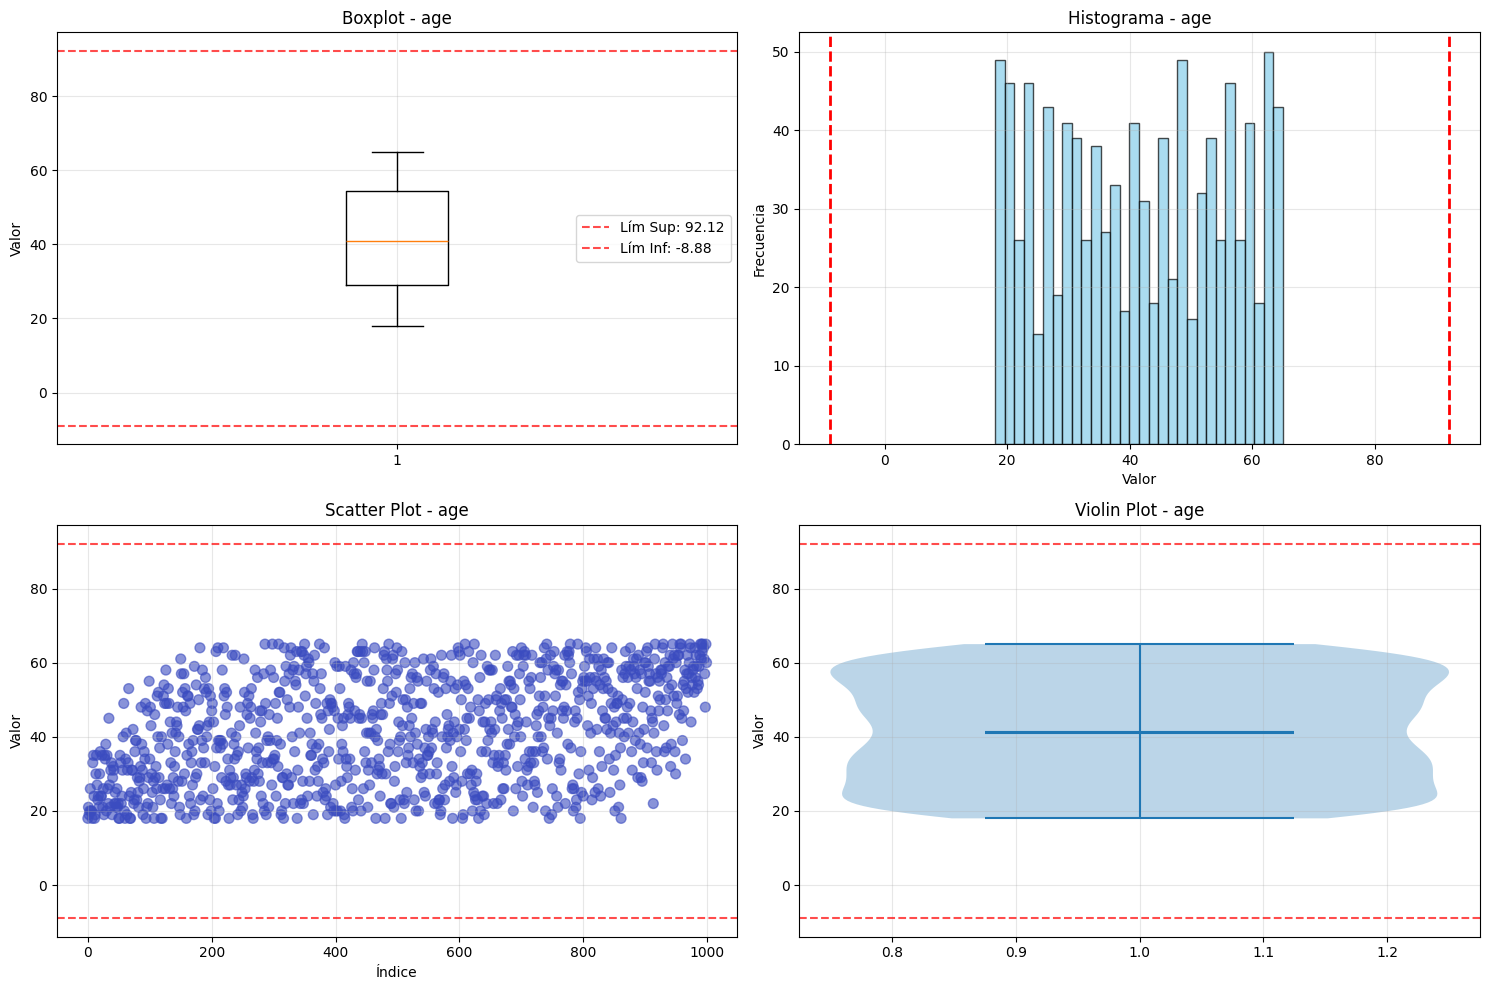


üìä ESTAD√çSTICAS - age:
   ‚Ä¢ Total observaciones: 1000
   ‚Ä¢ Outliers detectados: 0 (0.0%)
   ‚Ä¢ L√≠mites IQR: [-8.88, 92.12]
   ‚Ä¢ Rango IQR: [29.00, 54.25]


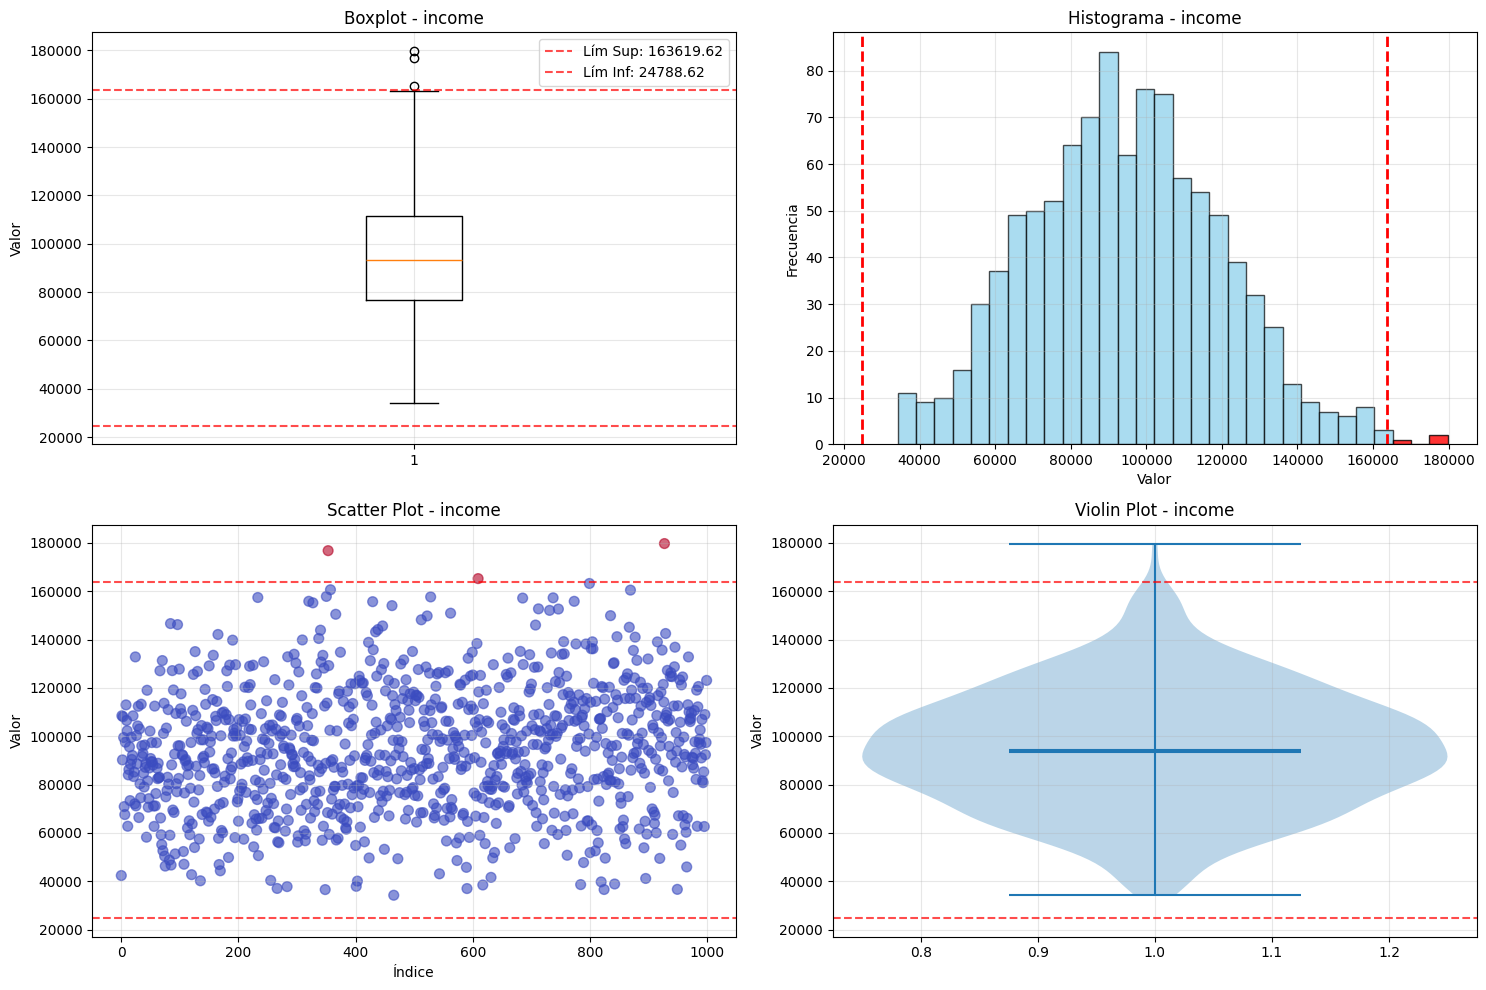


üìä ESTAD√çSTICAS - income:
   ‚Ä¢ Total observaciones: 1000
   ‚Ä¢ Outliers detectados: 3 (0.3%)
   ‚Ä¢ L√≠mites IQR: [24788.62, 163619.62]
   ‚Ä¢ Rango IQR: [76850.25, 111558.00]


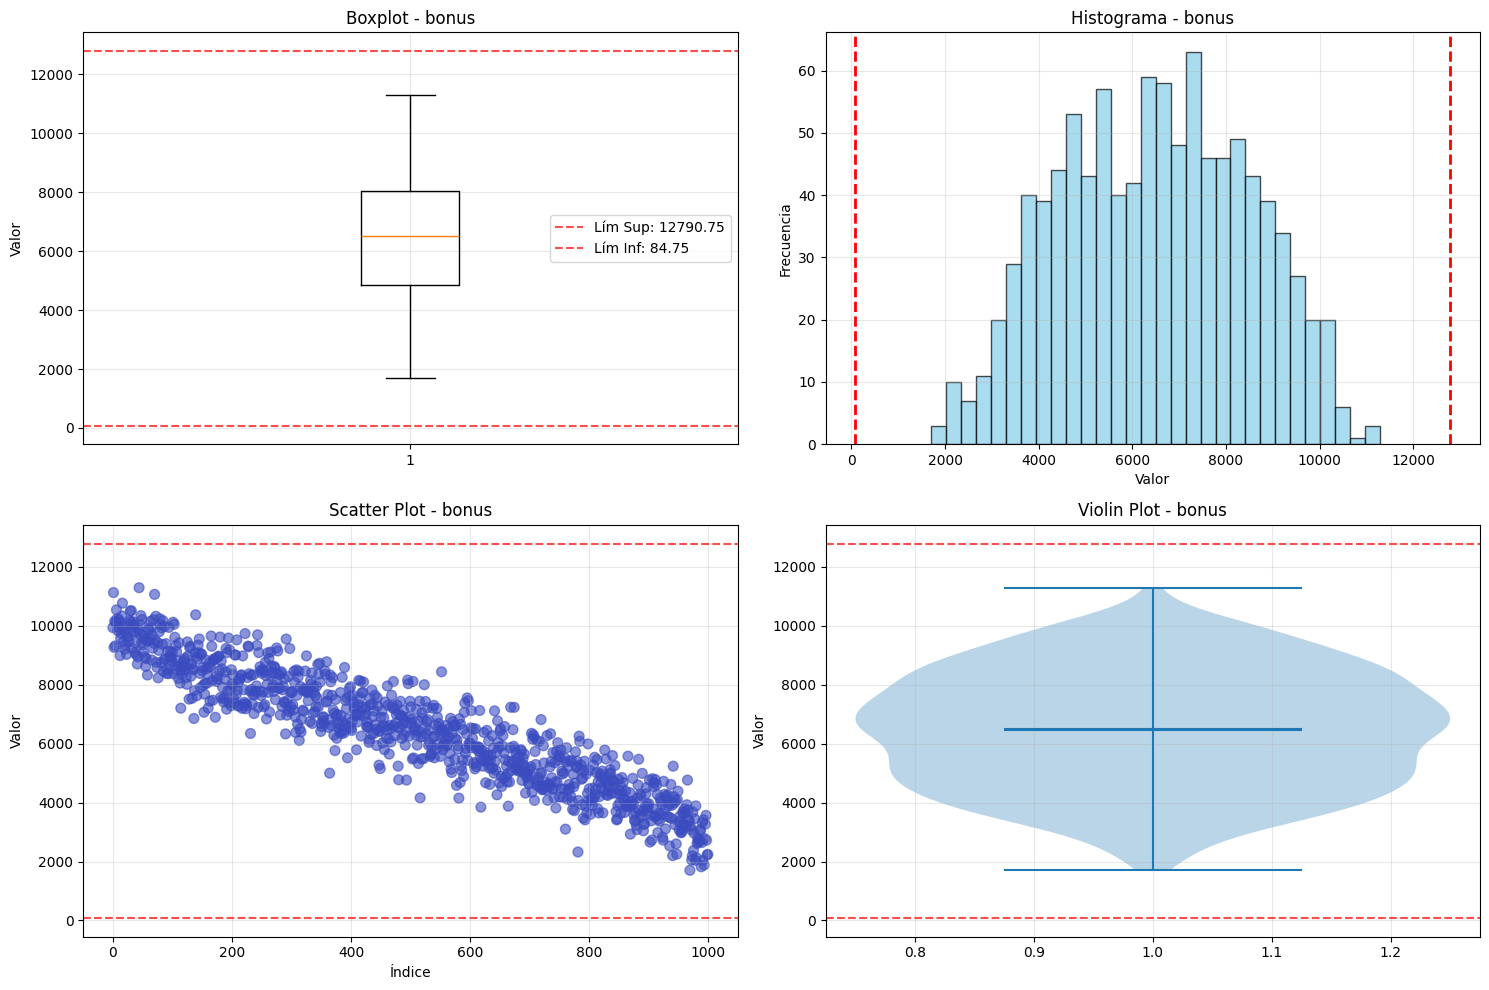


üìä ESTAD√çSTICAS - bonus:
   ‚Ä¢ Total observaciones: 1000
   ‚Ä¢ Outliers detectados: 0 (0.0%)
   ‚Ä¢ L√≠mites IQR: [84.75, 12790.75]
   ‚Ä¢ Rango IQR: [4849.50, 8026.00]


In [43]:
for column in numeric_columns:
    viz_outliers(df, column)

Tecnicas para "Remover outliers"

- Winsorizing: Reemplazar outliers con percentiles espec√≠ficos

- Capping: Limitar valores a umbrales definidos

In [45]:
def aplicar_winsorizing(data, limites=(0.05, 0.95)):
    """Aplica winsorizing a los datos"""
    inferior = np.percentile(data, limites[0] * 100)
    superior = np.percentile(data, limites[1] * 100)
    
    data_winsorized = data.copy()
    data_winsorized[data_winsorized < inferior] = inferior
    data_winsorized[data_winsorized > superior] = superior
    
    return data_winsorized

def aplicar_capping(data, metodo='iqr', factor=1.5):
    """Aplica capping usando diferentes m√©todos"""
    data_capped = data.copy()
    
    if metodo == 'iqr':
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lim_inf = Q1 - factor * IQR
        lim_sup = Q3 + factor * IQR
        
    elif metodo == 'percentile':
        lim_inf = np.percentile(data, 1)
        lim_sup = np.percentile(data, 99)
    
    elif metodo == 'zscore':
        z_scores = np.abs(stats.zscore(data))
        lim_sup = np.mean(data) + 3 * np.std(data)
        lim_inf = np.mean(data) - 3 * np.std(data)
    
    # Aplicar capping
    data_capped[data_capped < lim_inf] = lim_inf
    data_capped[data_capped > lim_sup] = lim_sup
    
    return data_capped, lim_inf, lim_sup

# Comparaci√≥n de m√©todos
def comparar_tecnicas_outliers(df, columna):
    """Compara diferentes t√©cnicas de tratamiento de outliers"""
    
    original = df[columna].dropna()
    
    # Aplicar diferentes t√©cnicas
    winsorized = aplicar_winsorizing(original)
    capped_iqr, lim_inf_iqr, lim_sup_iqr = aplicar_capping(original, 'iqr')
    capped_percentile, lim_inf_perc, lim_sup_perc = aplicar_capping(original, 'percentile')
    
    # Crear DataFrame comparativo
    comparacion = pd.DataFrame({
        'original': original,
        'winsorized': winsorized,
        'capped_iqr': capped_iqr,
        'capped_percentile': capped_percentile
    })
    
    return comparacion


In [47]:
for col in numeric_columns:
    # Aplicar a una columna de ejemplo
    comparacion = comparar_tecnicas_outliers(df, col)

    print(" COMPARACI√ìN DE T√âCNICAS ")
    print(f"Columna: {col}")
    print("\nEstad√≠sticas descriptivas:")
    print(comparacion.describe().round(2))

 COMPARACI√ìN DE T√âCNICAS 
Columna: age

Estad√≠sticas descriptivas:
       original  winsorized  capped_iqr  capped_percentile
count   1000.00     1000.00     1000.00            1000.00
mean      41.39       41.41       41.39              41.39
std       14.29       14.07       14.29              14.29
min       18.00       20.00       18.00              18.00
25%       29.00       29.00       29.00              29.00
50%       41.00       41.00       41.00              41.00
75%       54.25       54.25       54.25              54.25
max       65.00       63.00       65.00              65.00
 COMPARACI√ìN DE T√âCNICAS 
Columna: income

Estad√≠sticas descriptivas:
        original  winsorized  capped_iqr  capped_percentile
count    1000.00     1000.00     1000.00            1000.00
mean    94472.65    94274.67    94441.77           94425.95
std     25337.49    23054.19    25244.33           25116.55
min     34208.00    54788.40    34208.00           38852.58
25%     76850.25    76850.

/tmp/ipykernel_11646/3930573334.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '54788.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_winsorized[data_winsorized < inferior] = inferior
/tmp/ipykernel_11646/3930573334.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '163619.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_capped[data_capped > lim_sup] = lim_sup
/tmp/ipykernel_11646/3930573334.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38852.58' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_capped[data_capped < lim_inf] = lim_inf
/tmp/ipykernel_11646/3930573334.py:7: FutureWarning: S

# ** Gu√≠a Te√≥rica: Cu√°ndo Usar Winsorizing vs IQR vs Percentile**

## ** Comparativa Conceptual**

| M√©todo | Concepto | Robustez | Preservaci√≥n Datos | Casos Ideales |
|--------|----------|-----------|-------------------|---------------|
| **Winsorizing** | Reemplaza extremos con percentiles | Media | Alta | Datos con colas pesadas |
| **IQR (Capping)** | Corta valores beyond ¬±1.5√óIQR | Alta | Media | Distribuciones sim√©tricas |
| **Percentile** | Corta en percentiles fijos | Media | Baja | Conocimiento del dominio |

---

## ** WINSORIZING - Cu√°ndo Usar**

### **Casos Ideales:**
# Ejemplos donde WINSORIZING es mejor:

-  Datos financieros (retornos, precios)
    * "Retornos de acciones: -10%, 2%, 1%, 15%, -8%, 25%, -50%"
    * "‚Üí Winsorizing (5%, 95%) preserva la volatilidad pero controla extremos"

-  Mediciones m√©dicas (valores biol√≥gicos)
    * "Presi√≥n arterial: 120, 118, 122, 180, 115, 200, 110"
    * "‚Üí Los extremos pueden ser reales pero raros - winsorizing los suaviza"

-  Cuando importa la forma de la distribuci√≥n
    * "An√°lisis de distribuci√≥n de ingresos"
    * "‚Üí Winsorizing mantiene la forma general mientras controla outliers"


# **Gu√≠a Te√≥rica: Cu√°ndo Usar Winsorizing vs IQR vs Percentile**

## **WINSORIZING - Cu√°ndo Usar**

### **Casos Ideales:**

**1. Datos con colas pesadas o distribuciones asim√©tricas**
- Cuando los outliers son valores reales pero extremos
- Ejemplo: ingresos, precios de activos financieros, mediciones biol√≥gicas
- Preserva la forma de la distribuci√≥n mientras controla valores extremos

**2. Cuando se necesita mantener el tama√±o de la muestra**
- No reduce el n√∫mero de observaciones
- Reemplaza valores extremos en lugar de eliminarlos
- Importante en muestras peque√±as o an√°lisis estad√≠sticos que requieren n constante

**3. An√°lisis donde la varianza es importante**
- Mantiene mejor la variabilidad original que el capping
- Ideal para an√°lisis param√©tricos posteriores

**4. Cuando los valores extremos contienen informaci√≥n valiosa**
- Los outliers son casos raros pero leg√≠timos
- Ejemplo: pacientes con respuestas excepcionales a tratamientos

---

## **IQR (Capping) - Cu√°ndo Usar**

### **Casos Ideales:**

**1. Distribuciones aproximadamente normales o sim√©tricas**
- Cuando los datos siguen una distribuci√≥n en forma de campana
- El m√©todo IQR asume cierta simetr√≠a en los datos

**2. Outliers claramente err√≥neos o irrelevantes**
- Errores de medici√≥n, entrada de datos o instrumentaci√≥n
- Valores que no representan el fen√≥meno de inter√©s
- Ejemplo: edad registrada como 200 a√±os

**3. Control de calidad y procesos industriales**
- Cuando existen l√≠mites de especificaci√≥n conocidos
- Valores fuera de rangos fisiol√≥gicos o operativos aceptables

**4. Preparaci√≥n de datos para machine learning**
- Algoritmos sensibles a valores extremos
- Modelos que asumen distribuci√≥n normal o rangos acotados

**5. Cuando se busca un m√©todo estandarizado y ampliamente aceptado**
- IQR es f√°cil de explicar y entender
- M√©todo robusto que no depende de supuestos de normalidad

---

## **M√âTODO POR PERCENTILE - Cu√°ndo Usar**

### **Casos Ideales:**

**1. Conocimiento previo del dominio**
- Cuando se sabe que valores beyond ciertos percentiles no son v√°lidos
- Ejemplo: en antropometr√≠a, estaturas beyond percentil 1% o 99% pueden ser errores

**2. Datos con distribuciones muy irregulares**
- Cuando IQR no funciona bien por asimetr√≠a extrema
- Distribuciones multimodales o con gaps

**3. Benchmarking contra est√°ndares de la industria**
- Cuando existen percentiles de referencia establecidos
- Ejemplo: percentiles de crecimiento infantil, percentiles financieros

**4. Cuando se requieren l√≠mites fijos y consistentes**
- Los percentiles no cambian entre diferentes muestras de la misma poblaci√≥n
- √ötil para comparaciones longitudinales

---

## **Comparaci√≥n de Robustez**

**Winsorizing:**
- Menos distorsi√≥n de la distribuci√≥n original
- Mantiene mejor las propiedades estad√≠sticas
- M√°s suave con los valores extremos

**IQR:**
- Altamente robusto a outliers
- No depende de la media ni desviaci√≥n est√°ndar
- Funciona bien con distribuciones no normales

**Percentile:**
- Poco robusto con muestras peque√±as
- Sensible a la elecci√≥n arbitraria de percentiles
- Puede eliminar datos v√°lidos

---

## **Recomendaciones por Contexto**

**Investigaci√≥n Cient√≠fica:**
- Winsorizing para preservar informaci√≥n
- IQR cuando los outliers son errores de medici√≥n

**Finanzas y Econom√≠a:**
- Winsorizing para mantener las colas de distribuci√≥n
- Percentiles para an√°lisis de riesgo (VaR)

**Machine Learning:**
- IQR para la mayor√≠a de casos
- Winsorizing cuando los outliers contienen informaci√≥n predictiva

**Control de Calidad:**
- IQR o percentiles basados en especificaciones
- L√≠mites definidos por el proceso

---

## **Consideraciones Pr√°cticas**

**Tama√±o de Muestra:**
- Muestras peque√±as: Winsorizing o IQR
- Muestras grandes: Cualquier m√©todo funciona bien

**Prop√≥sito del An√°lisis:**
- An√°lisis exploratorio: Probar m√∫ltiples m√©todos
- An√°lisis inferencial: Winsorizing suave
- Modelado predictivo: IQR o eliminaci√≥n

**Distribuci√≥n de los Datos:**
- Sim√©trica: IQR
- Asim√©trica: Winsorizing
- Multimodal: Percentiles espec√≠ficos por modo

La elecci√≥n depende fundamentalmente de si consideramos que los outliers representan informaci√≥n valiosa o deben ser tratados como anomal√≠as a controlar.